In [20]:
import matplotlib.pyplot as plt
import numpy as np
from random import random, uniform
from time import time
from curvedpy.geodesics.blackhole import BlackholeGeodesicIntegrator
from curvedpy.utils.conversions_SPH2PATCH_3D import cart_to_sph1, sph2_to_cart, cart_to_sph2, coords_cart_to_sph2, J_sph2_to_cart, J_cart_to_sph2

In [21]:
gi = BlackholeGeodesicIntegrator()
gi_xyz = BlackholeGeodesicIntegrator(coordinates='xyz')

In [41]:
def get_random(max_step, coords):
    #k0, x0 = [1, 0, 0], [-10, 0., 5.1] # Shoot on +z axis
    E = []
    stdE = []
    L = []
    stdL = []
    norm_k = []
    std_norm_k = []

    l = 50
    
    for i in range(100):
        k0, x0 = [random(), random(), random()], np.array([uniform(-l, l), uniform(-l, l), uniform(-l, l)]) # Shoot on +z axis
        k0 = k0/np.linalg.norm(k0)
        #print(x0, k0)
        #print(k0)
        if np.linalg.norm(x0) > 2:
            if coords == "sph":
                k, x, r = gi.geodesic(k0, x0, max_step=max_step)
            elif coords == "xyz":
                k, x, r = gi_xyz.geodesic(k0, x0, max_step=max_step)
                k_t, k_x, k_y, k_z, _,_,_ = r.y
                t = r.t
                r['k_t'] = k_t
                r['t'] = t
            k_sph, x_sph = cart_to_sph1(k, x)
            k4 = np.array([r['k_t'], *k_sph])
            x4 = np.array([r['t'], *x_sph])
            k4__ = gi.get_metric().oneform(k4, x4)
            # print(np.dot( np.column_stack(k4__)[0], np.column_stack(k4)[0] ) )
            nk = np.array([np.dot(np.column_stack(k4__)[i], np.column_stack(k4)[i]) for i in range(len(np.column_stack(k4)))])
            
            norm_k.append(np.mean(nk))
            std_norm_k.append(np.std(nk))
            E.append(np.mean(k4__[0]))
            stdE.append(np.std(k4__[0]))
            L.append(np.mean(k4__[3]))
            stdL.append(np.std(k4__[3]))
    return np.array([np.mean(E), np.mean(stdE), np.mean(L), np.mean(stdL), np.mean(L), np.mean(norm_k), np.mean(std_norm_k)])

k.k=2.9339037803920332e-06, std(E)=2.848683833466949e-07, stdL=5.565865237300358e-07


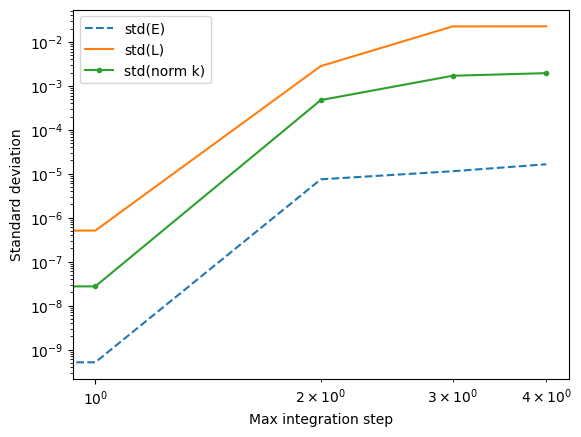

In [42]:
E, stdE, L, stdL, L, norm_k, std_norm_k = np.column_stack(np.array([get_random(max_step, "sph") for max_step in [0.1, 1.0, 10, 100, 1000]]))
plt.yscale('log')
plt.xscale('log')

plt.plot(stdE, "--", label="std(E)")
plt.plot(stdL, label="std(L)")
plt.plot(std_norm_k, ".-", label="std(norm k)")

plt.xlabel("Max integration step")
plt.ylabel("Standard deviation")
plt.legend()
print(f"k.k={float(norm_k[0])}, std(E)={float(stdE[0])}, stdL={stdL[0]}")

[ 13.51847935  23.16964225 -26.63106318] [0.45530506 0.80610215 0.3780167 ]
[39.97394093 20.62777037 14.43272171] [0.72079804 0.11119816 0.68416749]
[-45.92854217  -1.67344105 -31.41582058] [0.65834997 0.58148855 0.47796065]
[ 15.26880483 -37.77021422  25.69028204] [0.63129847 0.29750417 0.71620773]
[ 23.85455161 -11.09776862  21.43900603] [0.46240909 0.62232729 0.63157468]
[-45.5420387   -8.99871397 -37.00119658] [0.79153421 0.09503492 0.60369029]
[-19.14643039  22.3816835  -49.10869769] [0.18103016 0.516997   0.83662547]
[ 40.63619086 -39.3965403  -38.23209002] [0.33945256 0.88513159 0.31829865]
[ 9.33020262 33.10570622 -1.24364616] [0.39551221 0.59167021 0.70249303]
[-19.7630621   45.69634659   4.59451823] [0.86211883 0.50537447 0.03671202]
[-23.06994257  17.12370044   0.67612513] [0.35603643 0.00329845 0.93446625]
[-37.67526359   7.95640305  22.50954421] [0.69262917 0.1761387  0.69945692]
[  6.81265402  40.21753319 -19.21417202] [0.82943152 0.55856873 0.00665792]
[16.61451378 21.46

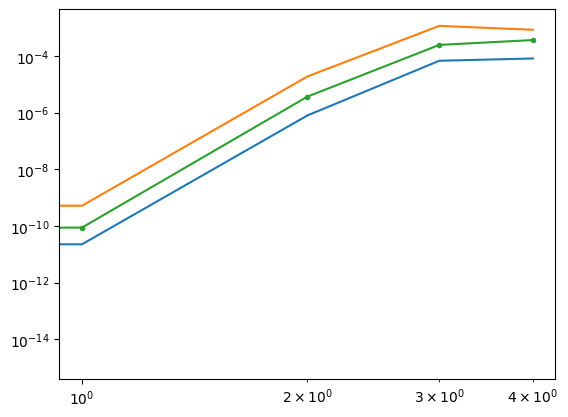

In [31]:
E, stdE, L, stdL, L, norm_k, std_norm_k = np.column_stack(np.array([get_random(max_step, "xyz") for max_step in [0.1, 1.0, 10, 100, 1000]]))
plt.yscale('log')
plt.xscale('log')

plt.plot(stdE)
plt.plot(stdL)
plt.plot(std_norm_k, ".-")

print(norm_k)